In [9]:

import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from collections import Counter

In [10]:
data = pd.read_csv("C:/Users/Miranda/Senior Project/alzheimersdisease.csv", delimiter=",", low_memory=False)
data

,CONDITION,OUTCOME,Year,Geography,GeoType,GeoName,GeoID,Region,District,Total,...,Other_notAIAN_Age15_24_Female,Other_notAIAN_Age15_24_FemaleRate,Other_notAIAN_Age25_44_Female,Other_notAIAN_Age25_44_FemaleRate,Other_notAIAN_Age45_64_Female,Other_notAIAN_Age45_64_FemaleRate,Other_notAIAN_Age45Plus_Female,Other_notAIAN_Age45Plus_FemaleRate,Other_notAIAN_Age65Plus_Female,Other_notAIAN_Age65Plus_FemaleRate
0,Alzheimer's Disease,Death,2017,Supervisorial District 1,SupervisorDistrict,1ST SUPERVISORIAL DIST,1,NaN,Supervisorial District 1,199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alzheimer's Disease,ED Discharge,2017,Supervisorial District 1,SupervisorDistrict,1ST SUPERVISORIAL DIST,1,NaN,Supervisorial District 1,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alzheimer's Disease,Hospitalization,2017,Supervisorial District 1,SupervisorDistrict,1ST SUPERVISORIAL DIST,1,NaN,Supervisorial District 1,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alzheimer's Disease,In-Patient Treatment,2017,Supervisorial District 1,SupervisorDistrict,1ST SUPERVISORIAL DIST,1,NaN,Supervisorial District 1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alzheimer's Disease,Physical Rehabilitation,2017,Supervisorial District 1,SupervisorDistrict,1ST SUPERVISORIAL DIST,1,NaN,Supervisorial District 1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,Alzheimer's Disease,In-Patient Treatment,2011,City of Vista,Municipal,VISTA,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3062,Alzheimer's Disease,Physical Rehabilitation,2011,Vista,SRA,VISTA,52,NORTH COASTAL,Supervisorial District 5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,Alzheimer's Disease,Physical Rehabilitation,2011,City of Vista,Municipal,VISTA,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3064,Alzheimer's Disease,SNF/Intermediate Care,2011,Vista,SRA,VISTA,52,NORTH COASTAL,Supervisorial District 5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After observing the database, the following the values are present

In [11]:
races = ['White', 'Black', 'Hispanic', 'API', 'AIAN', 'Other_notAIAN']
AgeGroups =["0-14", "15-24", "25-44", "45-64", "65Plus"]
Gender = ["Male", "Female"]
graphs = ""
pie=""


In [12]:
def getNumberFromData(df, race=None, ageGroup=None, gender=None, rate=None):
    if race is None:
        race=races
    if ageGroup is None:
        ageGroup = AgeGroups
    if gender is None:
        gender = Gender
    if rate is None:
        rate=""
        
    count = 0
    for gen in gender:
        for ra in race:
            for ag in ageGroup:
                id = ra + "_Age" + ag + "_" + gen 
                if id in df.keys():
                    #print(id)
                    _data = list(df[id])
                    for val in _data:
                        if not (pd.isna(val)):
                            #print(val)
                            count += int(val)
    return count
             

def plot_from_freq(frequencies, alphab, align=None):
    pos = np.arange(len(alphab))
    width = 0.4     # gives histogram aspect to the bar diagram

    plt.figure()
    ax = plt.axes()
    ax.set_xticks(pos)
    if align == "horizontal":
        plt.xticks(rotation=90)
        
    if graph == "The Amount People Having Alzeimer’s in Different Age Groups":
        plt.title("The Amount People Having Alzeimer’s in Different Age Groups")
        plt.xlabel("Age Groups")
        plt.ylabel("Amount of People")
    
    if graph=="Different Races With Alzheimer's":
        plt.title("Different Races With Alzheimer's")
        plt.xlabel("Races")
        plt.ylabel("Amount of People")
    
    if graph == "The increase in white cases from 2011-2017":
        plt.title("The increase in white cases from 2011-2017")
        plt.xlabel("Year")
        plt.ylabel("Amount of People")
    if graph == "The increase in Hispanic cases from 2011-2017":
        plt.title("The increase in Hispanic cases from 2011-2017")
        plt.xlabel("Year")
        plt.ylabel("Amount of People")
    if graph == "Outcome for Alzheimer’s from 2011 to 2017":
        plt.title("Outcome for Alzheimer’s from 2011 to 2017")
        plt.xlabel("Year")
        plt.ylabel("Outcome")  
    if pie == "PIE Outcome for Alzheimer’s from 2011 to 2017":
        plt.title("Outcome for Alzheimer’s from 2011 to 2017")
        plt.xlabel("Year")
        plt.ylabel("Outcome") 
    if graph == "The increase in Asian/Pacific Islander cases from 2011-2017":
        plt.title("The increase in Asian/Pacific Islander cases from 2011-2017")
        plt.xlabel("Year")
        plt.ylabel("Amount of People")
    if graph == "The increase in Black cases from 2011-2017":
        plt.title("The increase in African American cases from 2011-2017")
        plt.xlabel("Year")
        plt.ylabel("Amount of People")
    if graph == "The increase in other races not specified cases from 2011-2017":
        plt.title("The increase in other races not specified cases from 2011-2017")
        plt.xlabel("Year")
        plt.ylabel("Amount of People")
        
            
    ax.set_xticklabels(alphab)

    plt.bar(pos, frequencies, width, color='b')
    plt.tight_layout(pad=0.0)

## the total people having alzeimers in different age groups

<IPython.core.display.Javascript object>


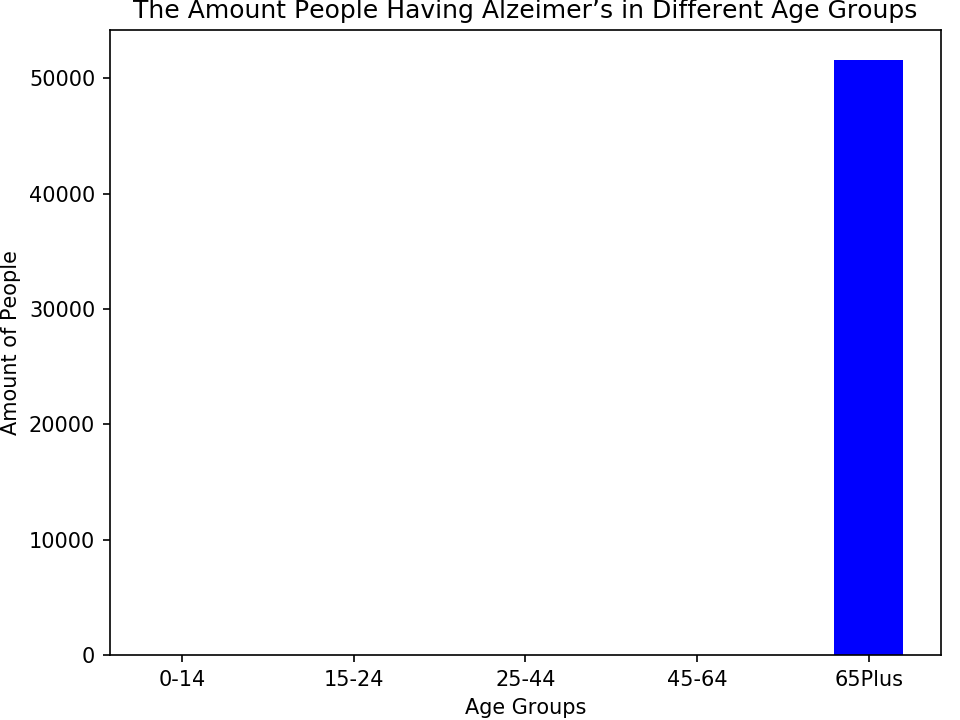

In [13]:
dying_from_alz = []
for age in AgeGroups:
    num = getNumberFromData(data, ageGroup=[age])
    dying_from_alz.append(num)

graph = "The Amount People Having Alzeimer’s in Different Age Groups"
plot_from_freq(dying_from_alz, AgeGroups)

the age group of 65+ is only affected by alzeimers

# Different races with Alzheimer’s

We note that only people above the age of 65 are having alzeimers

<IPython.core.display.Javascript object>


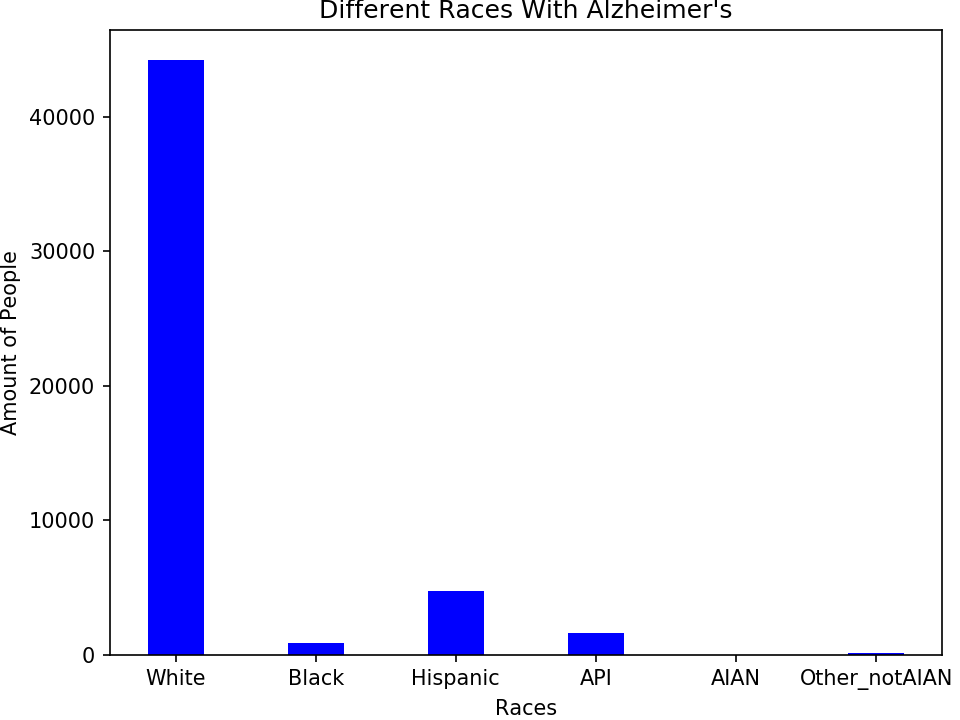

Counter({44196: 1, 864: 1, 4744: 1, 1599: 1, 0: 1, 166: 1})


In [14]:
dying_from_alz = []
for _race in races:
    num = getNumberFromData(data, ageGroup=["65Plus"], race=[_race])
    dying_from_alz.append(num)

graph="Different Races With Alzheimer's"
plot_from_freq(dying_from_alz, races)
print(Counter(dying_from_alz))


Clearly white prople are more affected by alzeimers. In other races the Hispanic race is significantly higher than others races. the AIAN race is the least affected by alzeimers deases.

## The increase in white cases from 2011-2017


<IPython.core.display.Javascript object>


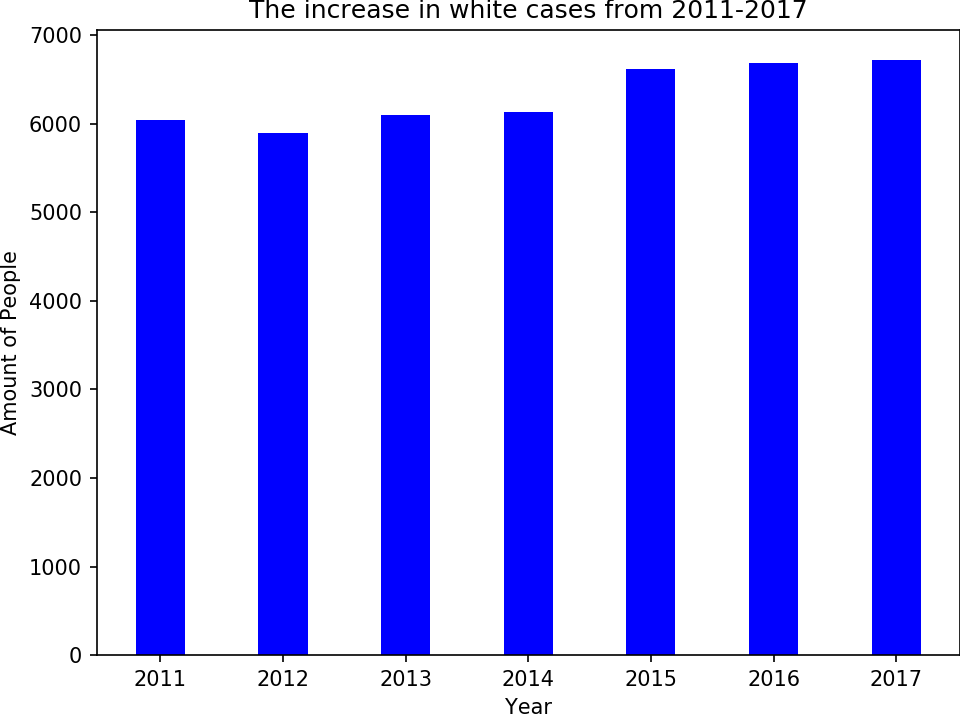

In [15]:
dying_from_alz = []
year = np.sort(data.Year.unique())

for yr in year:
    df = data.loc[data.Year == yr]
    num = getNumberFromData(df, ageGroup=["65Plus"], race=["White"])
    dying_from_alz.append(num)

graph = "The increase in white cases from 2011-2017"
plot_from_freq(dying_from_alz, year)

Clealy the cases in White race increases with years.

## For Hispanic race increase in cases with year

<IPython.core.display.Javascript object>


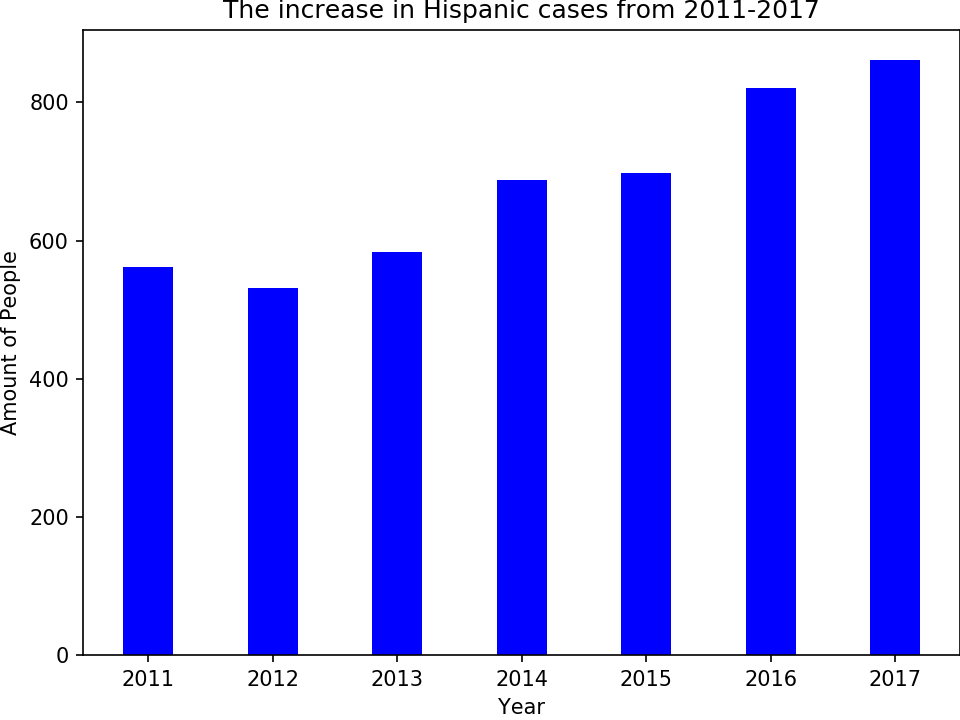

In [16]:
dying_from_alz = []
year = np.sort(data.Year.unique())

for yr in year:
    df = data.loc[data.Year == yr]
    num = getNumberFromData(df, ageGroup=["65Plus"], race=["Hispanic"])
    dying_from_alz.append(num)

graph = "The increase in Hispanic cases from 2011-2017"
plot_from_freq(dying_from_alz, year)

In the Hispanic race as well the cases increases with each year.

## Outcome for 2011 to 2017

<IPython.core.display.Javascript object>


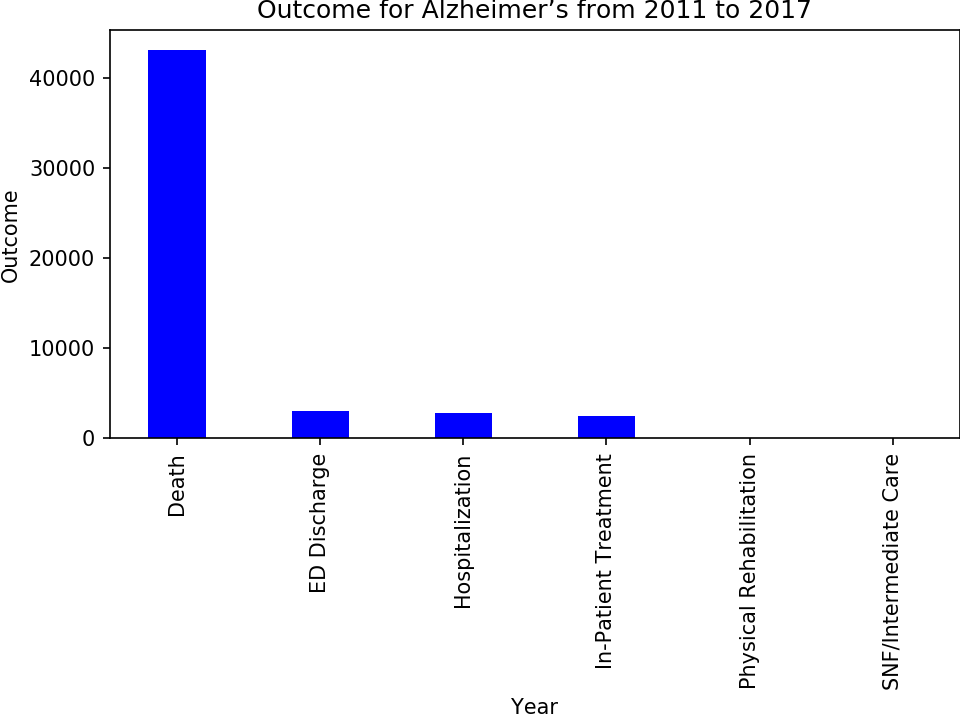

In [17]:
dying_from_alz = []
outcome = np.sort(data.OUTCOME.unique())
count = 0

for oc in outcome:
    df = data.loc[data.OUTCOME == oc]
    num = getNumberFromData(df, ageGroup=["65Plus"])
    dying_from_alz.append(num)

graph = "Outcome for Alzheimer’s from 2011 to 2017"
plot_from_freq(dying_from_alz, outcome, align="horizontal")


#print(Counter(dying_from_alz))

#pie = "PIE Outcome for Alzheimer’s from 2011 to 2017"
# pie chart
#plt.style.use("fivethirtyeight")
#slices=[83,5.8,5.5,4.8,0,.1]
#labels=['Death','ED Discharge','Hospitalization','In-Patient Treatment','Physical Rehabilitation','SNF/Intermediate Care']
#plt.pie(slices,labels=labels,wedgeprops={'edgecolor': 'black'})
#plt.savefig('pie.jpg')
#plt.title("Outcome for Alzheimer's from 2011 to 2017")
#plt.tight_layout()
#plt.show()




Clearly rarely the cases avoids death.

<IPython.core.display.Javascript object>


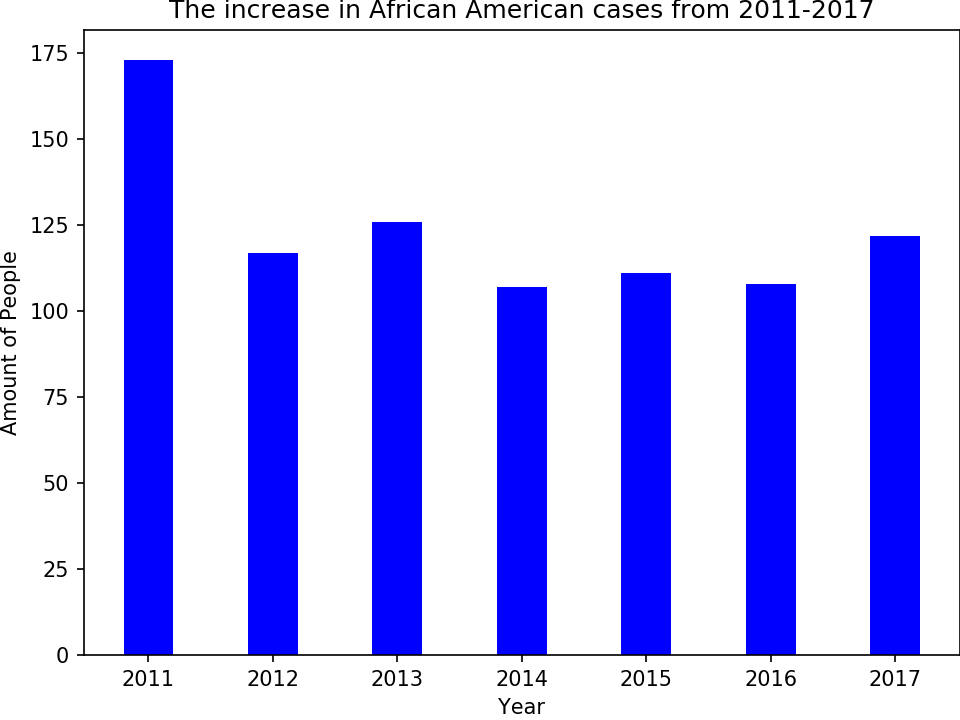

In [18]:
dying_from_alz = []
year = np.sort(data.Year.unique())

for yr in year:
    df = data.loc[data.Year == yr]
    num = getNumberFromData(df, ageGroup=["65Plus"], race=["Black"])
    dying_from_alz.append(num)

graph = "The increase in Black cases from 2011-2017"
plot_from_freq(dying_from_alz, year)

<IPython.core.display.Javascript object>


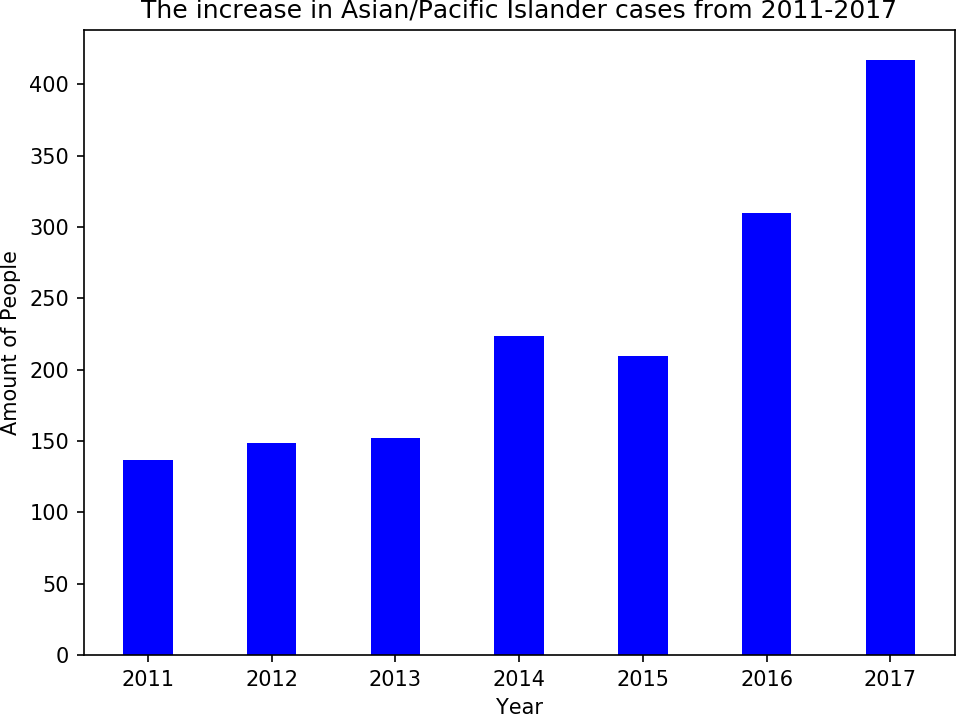

In [19]:
dying_from_alz = []
year = np.sort(data.Year.unique())

for yr in year:
    df = data.loc[data.Year == yr]
    num = getNumberFromData(df, ageGroup=["65Plus"], race=["API"])
    dying_from_alz.append(num)

graph = "The increase in Asian/Pacific Islander cases from 2011-2017"
plot_from_freq(dying_from_alz, year)

<IPython.core.display.Javascript object>


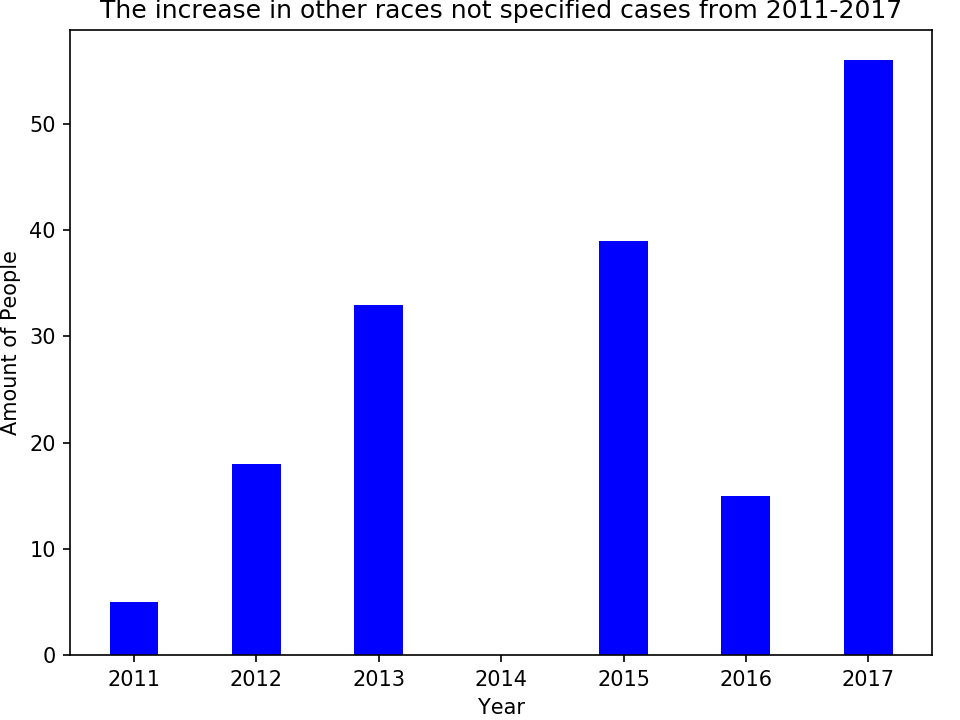

In [22]:
dying_from_alz = []
year = np.sort(data.Year.unique())

for yr in year:
    df = data.loc[data.Year == yr]
    num = getNumberFromData(df, ageGroup=["65Plus"], race=["Other_notAIAN"])
    dying_from_alz.append(num)

graph = "The increase in other races not specified cases from 2011-2017"
plot_from_freq(dying_from_alz, year)